<a href="https://colab.research.google.com/github/JUANCARLOST-LAB/ASL-Model/blob/models/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [1]:
import string
letters = list(string.ascii_uppercase)
letters

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [3]:
numbers = [str(num) for num in range(0, 10)]
numbers

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [4]:
class_names = letters + numbers
class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [5]:
df = pd.read_csv('coords.csv')
df['class'].value_counts()


<ipython-input-5-4e53fcd141c7>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('coords.csv')


class
A    800
R    800
8    800
6    800
5    800
4    800
3    800
2    800
1    800
Y    800
X    800
W    800
V    800
U    800
T    800
B    800
S    800
Q    800
P    800
C    800
D    800
E    800
F    800
G    800
H    800
I    800
K    800
L    800
M    800
N    800
O    800
9    800
7    576
7    224
Name: count, dtype: int64

In [6]:
df.dropna(axis = 0, inplace = True)

In [7]:
df['class'] = pd.Series(df['class'], dtype=str)

In [8]:
df_alpha = df[df['class'].map(lambda c : c.isalpha())]
df_numeric = df[df['class'].map(lambda c : c.isnumeric())]

In [9]:
X_alpha = df_alpha.drop('class', axis = 1)
y_alpha = df_alpha['class']
X_numeric = df_numeric.drop('class', axis = 1)
y_numeric = df_numeric['class']

In [10]:
alpha_encoder = LabelEncoder()
y_alpha = alpha_encoder.fit_transform(y_alpha)
print(y_alpha)

numeric_encoder = LabelEncoder()
y_numeric = numeric_encoder.fit_transform(y_numeric)
print(y_numeric)

alpha_labels = {}
numeric_labels = {}

for letter in letters:
  if letter not in ['J', 'Z']:
    alpha_labels[alpha_encoder.transform([letter])[0]] = [letter]

for n in numbers:
  if n != '0':
    numeric_labels[numeric_encoder.transform([str(n)])[0]] = [n]
print(alpha_labels.keys())
alpha_labels = pd.DataFrame(alpha_labels)
numeric_labels = pd.DataFrame(numeric_labels)

alpha_labels.to_csv("alpha_labels.csv")
numeric_labels.to_csv("numeric_labels.csv")

[ 0  0  0 ... 23 23 23]
[0 0 0 ... 8 8 8]
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])


In [11]:
X_alpha_train, X_alpha_test, y_alpha_train, y_alpha_test = train_test_split(X_alpha, y_alpha,
                                                                            test_size = 0.3,
                                                                            random_state = 42,
                                                                            shuffle=True,
                                                                            stratify = y_alpha)
X_numeric_train, X_numeric_test, y_numeric_train, y_numeric_test = train_test_split(X_numeric, y_numeric,
                                                                            test_size = 0.3,
                                                                            random_state = 42,
                                                                            shuffle=True,
                                                                            stratify = y_numeric)

In [21]:
alpha_class_models = {
    'lr_alpha': make_pipeline(StandardScaler(), LogisticRegression(max_iter = 300)),
    'rc_alpha': make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gbc_alpha': make_pipeline(StandardScaler(), xgb.XGBClassifier())
}

numeric_class_models = {
    'lr_numeric': make_pipeline(StandardScaler(), LogisticRegression(max_iter = 300)),
    'rc_numeric': make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gbc_numeric': make_pipeline(StandardScaler(), xgb.XGBClassifier())
}

alpha_fit_models = {}
numeric_fit_models = {}

for algo, model in alpha_class_models.items():
    alpha_fit_models[algo] = model.fit(X_alpha_train, y_alpha_train)
    preds = model.predict(X_alpha_train)
    acc = accuracy_score(y_alpha_train, preds)
    print(algo, acc)

for algo, model in numeric_class_models.items():
    numeric_fit_models[algo] = model.fit(X_numeric_train, y_numeric_train)
    preds = model.predict(X_numeric_train)
    acc = accuracy_score(y_numeric_train, preds)
    print(algo, acc)

lr_alpha 0.9868303571428572
rc_alpha 1.0
gbc_alpha 1.0
lr_numeric 0.9964285714285714
rc_numeric 1.0
gbc_numeric 1.0


In [27]:
for algo, model in alpha_fit_models.items():
    preds = model.predict(X_alpha_test)
    acc = accuracy_score(y_alpha_test, preds)
    print(algo, acc)

for algo, model in numeric_fit_models.items():
    preds = model.predict(X_numeric_test)
    acc = accuracy_score(y_numeric_test, preds)
    print(algo, acc)

lr_alpha 0.9861111111111112
rc_alpha 0.9793402777777778
gbc_alpha 0.9810763888888889
lr_numeric 0.9902777777777778
rc_numeric 0.9893518518518518
gbc_numeric 0.9875


## Neural Network

In [ ]:
!pip install scikeras tensorflow

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
def create_alpha_asl_nn():
  model = Sequential([
      Dense(input_shape=(84,), units=84, activation='relu'),
      Dense(units=32, activation='relu'),
      Dense(units=len(letters), activation='softmax')
  ])
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
  model.summary()
  return model

def create_numeric_asl_nn():
  model = Sequential([
      Dense(input_shape=(84,), units=84, activation='relu'),
      Dense(units=32, activation='relu'),
      Dense(units=len(numbers), activation='softmax')
  ])
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
  model.summary()
  return model

In [14]:
alpha_nn_classifier = KerasClassifier(build_fn = create_alpha_asl_nn, epochs=200, batch_size=200, shuffle=True, verbose=1, validation_split=0.2 )
alpha_nn = make_pipeline(StandardScaler(), alpha_nn_classifier)

numeric_nn_classifier = KerasClassifier(build_fn = create_numeric_asl_nn, epochs=100, batch_size=100, shuffle=True, verbose=1, validation_split=0.2 )
numeric_nn = make_pipeline(StandardScaler(), numeric_nn_classifier)

In [15]:
alpha_nn_classifier.fit(X_alpha_train, y_alpha_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 84)                  │           7,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,718 (41.87 KB)

 Trainable params: 10,718 (41.87 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0489 - loss: 3.2212 - val_accuracy: 0.0778 - val_loss: 3.1309
Epoch 2/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1069 - loss: 3.0710 - val_accuracy: 0.1726 - val_loss: 2.8979
Epoch 3/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2435 - loss: 2.7830 - val_accuracy: 0.2783 - val_loss: 2.5146
Epoch 4/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3306 - loss: 2.3741 - val_accuracy: 0.4498 - val_loss: 2.1076
Epoch 5/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4713 - loss: 1.9976 - val_accuracy: 0.5063 - val_loss: 1.8186
Epoch 6/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5305 - loss: 1.7331 - val_accuracy: 0.5800 - val_loss: 1.6060
Epoch 7/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6032 - loss: 1.5227 - val_accuracy: 0.5770 - val_loss: 1.4240
Epoch 8/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6332 - loss: 1.3431 - val_accuracy: 0.6522 - v

KerasClassifier(
	model=None
	build_fn=<function create_alpha_asl_nn at 0x7daeda08bac0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=200
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=200
	class_weight=None
)

Text(0.5, 1.0, 'loss train vs test')

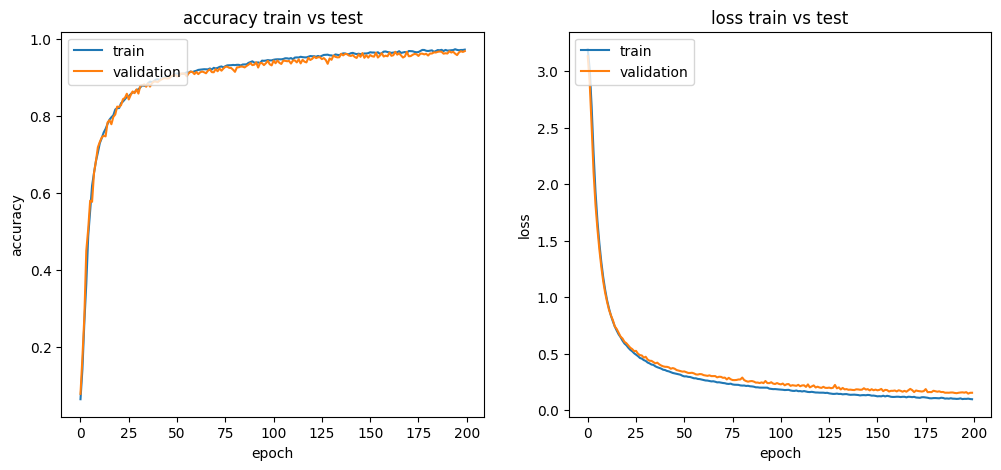

In [66]:
import matplotlib.pyplot as plt

figure, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(alpha_nn_classifier.history_['accuracy'], label='train')
ax[0].plot(alpha_nn_classifier.history_['val_accuracy'], label='validation')
ax[0].legend(['train', 'validation'], loc='upper left')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('accuracy')
ax[0].set_title('accuracy train vs test')

ax[1].plot(alpha_nn_classifier.history_['loss'], label='train')
ax[1].plot(alpha_nn_classifier.history_['val_loss'], label='validation')
ax[1].legend(['train', 'validation'], loc='upper left')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].set_title('loss train vs test')

In [16]:
numeric_nn_classifier.fit(X_numeric_train, y_numeric_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 84)                  │           7,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,190 (39.80 KB)

 Trainable params: 10,190 (39.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1138 - loss: 2.2943 - val_accuracy: 0.1627 - val_loss: 2.1732
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2241 - loss: 2.1373 - val_accuracy: 0.3810 - val_loss: 1.9984
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4524 - loss: 1.9294 - val_accuracy: 0.5188 - val_loss: 1.7303
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5061 - loss: 1.6437 - val_accuracy: 0.6052 - val_loss: 1.4427
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6242 - loss: 1.3495 - val_accuracy: 0.7024 - val_loss: 1.1928
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7299 - loss: 1.1177 - val_accuracy: 0.8145 - val_loss: 0.9919
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7910 - loss: 0.9379 - val_accuracy: 0.8413 - val_loss: 0.8363
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8207 - loss: 0.7963 - val_accuracy: 0.8433 - v

KerasClassifier(
	model=None
	build_fn=<function create_numeric_asl_nn at 0x7daeda08bb50>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=100
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=100
	class_weight=None
)

Text(0.5, 1.0, 'loss train vs test')

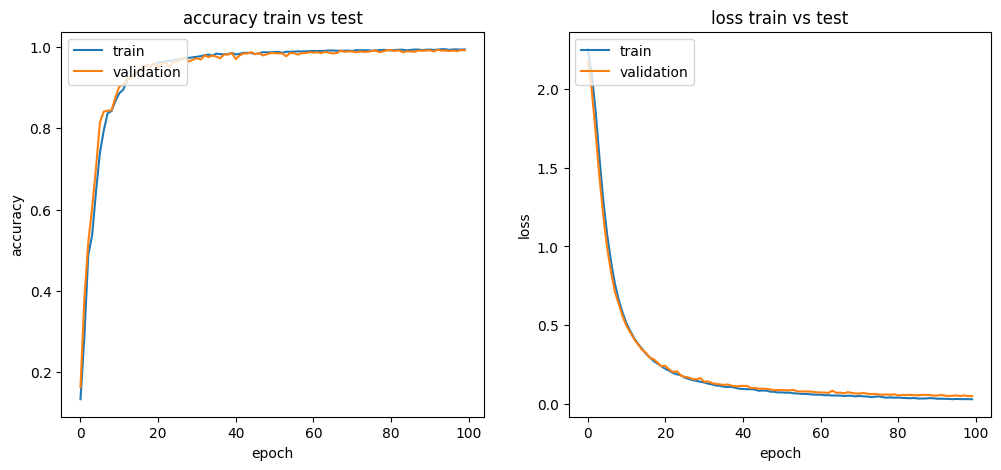

In [67]:
figure, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(numeric_nn_classifier.history_['accuracy'], label='train')
ax[0].plot(numeric_nn_classifier.history_['val_accuracy'], label='validation')
ax[0].legend(['train', 'validation'], loc='upper left')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('accuracy')
ax[0].set_title('accuracy train vs test')

ax[1].plot(numeric_nn_classifier.history_['loss'], label='train')
ax[1].plot(numeric_nn_classifier.history_['val_loss'], label='validation')
ax[1].legend(['train', 'validation'], loc='upper left')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].set_title('loss train vs test')

In [17]:
preds = alpha_nn_classifier.predict(X_alpha_test)
print(preds, y_alpha_test)
acc = accuracy_score(y_alpha_test, preds)
print('NN', acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[10 20 15 ...  8 19 22] [10 20 15 ...  8 19 22]
NN 0.9677083333333333


In [18]:
preds = numeric_nn_classifier.predict(X_numeric_test)
print(preds, y_numeric_test)
acc = accuracy_score(y_numeric_test, preds)
print('NN', acc)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[4 7 3 ... 4 4 8] [4 7 4 ... 4 4 8]
NN 0.9842592592592593


In [22]:
import pickle
import os

if os.path.isdir('models'):
  print("directori models existente")
else:
  os.mkdir('models')
# save
with open('models/alpha_nn_ASL.pkl','wb') as f:
    pickle.dump(alpha_nn_classifier,f)

with open('models/numeric_nn_ASL.pkl','wb') as f:
    pickle.dump(numeric_nn_classifier,f)

for algo, model in alpha_fit_models.items():
    with open(f'models/{algo}_ASL.pkl','wb') as f:
      pickle.dump(model,f)

for algo, model in numeric_fit_models.items():
    with open(f'models/{algo}_ASL.pkl','wb') as f:
      pickle.dump(model,f)

In [23]:
!zip -r '/content/models.zip' '/content/models/'

  adding: content/models/ (stored 0%)
  adding: content/models/gbc_alpha_ASL.pkl (deflated 76%)
  adding: content/models/lr_numeric_ASL.pkl (deflated 26%)
  adding: content/models/rc_numeric_ASL.pkl (deflated 82%)
  adding: content/models/lr_alpha_ASL.pkl (deflated 25%)
  adding: content/models/rc_alpha_ASL.pkl (deflated 90%)
  adding: content/models/alpha_nn_ASL.pkl (deflated 36%)
  adding: content/models/.ipynb_checkpoints/ (stored 0%)
  adding: content/models/numeric_nn_ASL.pkl (deflated 38%)
  adding: content/models/gbc_numeric_ASL.pkl (deflated 82%)


In [ ]:
with open('models/lr_alpha_ASL.pkl', 'rb') as f:
  ASL_letter_classifier = pickle.load(f)
  pred = ASL_letter_classifier.predict([X_alpha_test.iloc[0]])
  print(pred)
  print(y_alpha_test[0])

[10]
10


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
